## Курсовой проект 
## "Библиотеки Python для Data Science: Numpy, Matplotlib, Scikit-learn"

### Загружаем необходимые библиотеки

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score as r2
from sklearn.model_selection import GridSearchCV

%matplotlib inline
import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt

import seaborn as sns
%config InlineBackend.figure_format = 'svg'

from pylab import rcParams
rcParams['figure.figsize']=12,6

In [2]:
import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Загружаем данные

In [3]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

### Data fields

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

### Обзор данных

In [4]:
train.shape

(10000, 20)

In [5]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [6]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [7]:
test.shape

(5000, 19)

In [8]:
test.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2'],
      dtype='object')

### Для последующей обработки соединяем тренировочный и тестовый датафреймы

In [9]:
df = pd.concat([train, test], axis = 0)

In [10]:
test_id = test['Id']

In [11]:
df.shape

(15000, 20)

### Обзор данных

In [12]:
df['DistrictId'] = df['DistrictId'].astype(str)

In [13]:
df.set_index('Id', inplace=True)


In [14]:
df.tail()

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
Id,,,,,,,,,,,,,,,,,,,
8180,11,0.000170,B,B,5,NaN,1,9.0,1973,6.0,50.809797,NaN,3.0,1,B,36,5992,0,67.133911
4695,1,0.007122,B,B,12,NaN,0,17.0,2017,10.0,21.807061,NaN,1.0,1,B,1,264,0,40.198472
5783,12,0.090799,B,B,23,NaN,5,22.0,1989,9.0,48.282625,NaN,3.0,15,B,74,19083,2,77.842178
4780,62,0.072158,B,B,4,NaN,0,0.0,1977,0.0,NaN,NaN,2.0,0,A,2,629,1,81.305222
12504,30,0.000078,B,B,10,1046.0,3,17.0,1977,1.0,NaN,NaN,2.0,23,B,22,6398,141,60.555693


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 14038 to 12504
Data columns (total 19 columns):
DistrictId       15000 non-null object
Ecology_1        15000 non-null float64
Ecology_2        15000 non-null object
Ecology_3        15000 non-null object
Floor            15000 non-null int64
Healthcare_1     7825 non-null float64
Helthcare_2      15000 non-null int64
HouseFloor       15000 non-null float64
HouseYear        15000 non-null int64
KitchenSquare    15000 non-null float64
LifeSquare       11846 non-null float64
Price            10000 non-null float64
Rooms            15000 non-null float64
Shops_1          15000 non-null int64
Shops_2          15000 non-null object
Social_1         15000 non-null int64
Social_2         15000 non-null int64
Social_3         15000 non-null int64
Square           15000 non-null float64
dtypes: float64(8), int64(7), object(4)
memory usage: 2.3+ MB


### Обзор количественных пременных

In [16]:
df_num_features = df.select_dtypes(include=['float64', 'int64'])
df_num_features.describe().T

,count,mean,std,min,25%,50%,75%,max
Ecology_1,15000.0,0.119196,0.119371,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Floor,15000.0,8.561800,5.323113,1.000000,4.000000,7.000000,12.000000,7.800000e+01
Healthcare_1,7825.0,1144.162428,1029.296278,0.000000,350.000000,900.000000,1548.000000,4.849000e+03
Helthcare_2,15000.0,1.319467,1.489012,0.000000,0.000000,1.000000,2.000000,6.000000e+00
HouseFloor,15000.0,12.606600,6.780165,0.000000,9.000000,12.000000,17.000000,1.170000e+02
HouseYear,15000.0,3321.575067,163707.780381,1908.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
KitchenSquare,15000.0,6.174467,24.016979,0.000000,1.000000,6.000000,9.000000,2.014000e+03
LifeSquare,11846.0,36.851792,71.120183,0.333490,22.896130,32.822810,45.144624,7.480592e+03
Price,10000.0,214138.857399,92872.293865,59174.778028,153872.633942,192269.644879,249135.462171,6.332335e+05
Rooms,15000.0,1.897000,0.839229,0.000000,1.000000,2.000000,2.000000,1.900000e+01


#### Целевая переменная

In [17]:
target_mean = round(train['Price'].mean(), 2)
target_median = train['Price'].median()
target_mode = train['Price'].mode()[0]

print('Среднее:', target_mean) 
print('Медиана:', target_median) 
print('Мода:', target_mode)

Среднее: 214138.86
Медиана: 192269.64487934904
Мода: 59174.77802758122


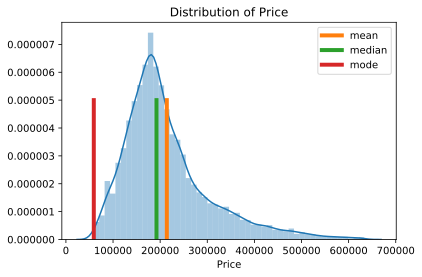

In [18]:
sns.distplot(train['Price'])

y = np.linspace(0, 0.000005, 200)
plt.plot([target_mean] * 200, y, label='mean', linestyle='-', linewidth=4)
plt.plot([target_median] * 200, y, label='median', linestyle='-', linewidth=4)
plt.plot([target_mode] * 200, y, label='mode', linestyle='-', linewidth=4)
plt.title('Distribution of Price')
plt.legend(loc = 'upper right')
plt.show()

### Обзор категориальных пременных

In [19]:
df.describe(include=['object', 'bool'])

,DistrictId,Ecology_2,Ecology_3,Shops_2
count,15000,15000,15000,15000
unique,212,2,2,2
top,27,B,B,B
freq,1242,14855,14576,13763


### Обработка выбросов

#### HouseFloor, Floor

In [20]:
df['HouseFloor'].sort_values().unique()

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  36.,  37.,  38.,  39.,  40.,  44.,  45.,  47.,  48.,
        99., 117.])

In [21]:
df['Floor'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 33, 34, 37, 38,
       42, 46, 78], dtype=int64)

In [22]:
df['Floor'] = df['Floor'].astype(int)
df['HouseFloor'] = df['HouseFloor'].astype(int)

In [23]:
df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df['HouseFloor'].median()

In [24]:
# df.loc[(df['Floor'] > df['HouseFloor']), 'Floor'], df.loc[(df['Floor'] > df['HouseFloor']), 'HouseFloor'] = df.loc[
#     (df['Floor'] > df['HouseFloor']), 'HouseFloor'], df.loc[(df['Floor'] > df['HouseFloor']), 'Floor']

#### Rooms

In [25]:
df['Rooms'].value_counts()

2.0     5910
1.0     5474
3.0     3334
4.0      240
5.0       25
0.0       10
6.0        3
10.0       2
19.0       1
17.0       1
Name: Rooms, dtype: int64

In [26]:
df.loc[(df['Rooms'] == 0) & (df['Square'] >100), 'Rooms'] = df['Rooms'].mode()

In [27]:
df.loc[(df['Rooms'] == 0), 'Rooms'] = df['Rooms'].median()

In [28]:
df['Rooms'].value_counts()

2.0     5917
1.0     5474
3.0     3334
4.0      240
5.0       25
6.0        3
10.0       2
19.0       1
17.0       1
Name: Rooms, dtype: int64

In [29]:
df[df['Rooms'].isin([10, 19, 17])]

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
Id,,,,,,,,,,,,,,,,,,,
5927,57,0.090799,B,B,22,NaN,5,22.0,2002,10.0,36.223072,317265.323792,10.0,15,B,74,19083,2,59.056975
8491,1,0.007122,B,B,17,NaN,0,17.0,2014,7.0,21.779288,78364.616704,19.0,1,B,1,264,0,42.006046
14865,9,0.161532,B,B,3,30.0,2,2.0,1994,10.0,38.420681,172329.270863,10.0,4,B,25,5648,1,60.871266
1435,111,0.093443,B,B,15,3300.0,2,17.0,1987,8.0,32.528342,NaN,17.0,4,B,23,4635,5,52.866107


In [30]:
df.loc[df['Rooms'].isin([10, 19, 17]), 'Rooms'] = df['Rooms'].median()

#### KitchenSquare

In [31]:
df.loc[(df['KitchenSquare'] > 39), 'KitchenSquare'] = df['KitchenSquare'].median()

In [32]:
df.loc[(df['KitchenSquare'] > 20) & (df['LifeSquare'] < 50), 'KitchenSquare'] = df['KitchenSquare'].median()

In [33]:
df[df['KitchenSquare'] > 20].head()

,DistrictId,Ecology_1,Ecology_2,Ecology_3,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Shops_2,Social_1,Social_2,Social_3,Square
Id,,,,,,,,,,,,,,,,,,,
12924,30,0.000078,B,B,3,1046.0,3,2.0,2018,22.0,53.649526,165521.195968,3.0,23,B,22,6398,141,92.473796
5548,86,0.161976,B,A,12,4508.0,3,37.0,2011,26.0,233.949309,455264.882666,5.0,7,B,31,7010,5,275.645284
14556,183,0.037316,B,B,6,562.0,4,7.0,1912,23.0,98.187482,284884.959104,4.0,10,B,32,6748,93,151.150660
6674,54,0.006076,B,B,18,645.0,6,28.0,2011,30.0,125.486563,367353.574566,1.0,6,B,30,5285,0,168.086347
15947,129,0.020741,B,B,5,1340.0,2,3.0,2015,31.0,84.830074,340273.238253,4.0,5,B,24,5613,5,185.906396


#### HouseYear

In [34]:
df['HouseYear'].describe()

count    1.500000e+04
mean     3.321575e+03
std      1.637078e+05
min      1.908000e+03
25%      1.974000e+03
50%      1.977000e+03
75%      2.001000e+03
max      2.005201e+07
Name: HouseYear, dtype: float64

In [35]:
df.loc[(df['HouseYear'] == 20052011), 'HouseYear'] = 2011

In [36]:
df.loc[(df['HouseYear'] > 2020), 'HouseYear'] = df['HouseYear'].median()

### Обработка категориальных переменных - дамми-переменные

In [38]:
df = pd.concat([df, pd.get_dummies(df['Shops_2'], prefix='Shops_2')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Ecology_2')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Ecology_3'], prefix='Ecology_3')], axis=1)

In [39]:
df.drop(columns=['Ecology_2', 'Ecology_3', 'Shops_2'], inplace=True)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 14038 to 12504
Data columns (total 22 columns):
DistrictId       15000 non-null object
Ecology_1        15000 non-null float64
Floor            15000 non-null int32
Healthcare_1     7825 non-null float64
Helthcare_2      15000 non-null int64
HouseFloor       15000 non-null float64
HouseYear        15000 non-null float64
KitchenSquare    15000 non-null float64
LifeSquare       11846 non-null float64
Price            10000 non-null float64
Rooms            14997 non-null float64
Shops_1          15000 non-null int64
Social_1         15000 non-null int64
Social_2         15000 non-null int64
Social_3         15000 non-null int64
Square           15000 non-null float64
Shops_2_A        15000 non-null uint8
Shops_2_B        15000 non-null uint8
Ecology_2_A      15000 non-null uint8
Ecology_2_B      15000 non-null uint8
Ecology_3_A      15000 non-null uint8
Ecology_3_B      15000 non-null uint8
dtypes: float64(9), int32(1), int

### Заполнение пропусков

In [41]:
df.isnull().sum()

DistrictId          0
Ecology_1           0
Floor               0
Healthcare_1     7175
Helthcare_2         0
HouseFloor          0
HouseYear           0
KitchenSquare       0
LifeSquare       3154
Price            5000
Rooms               3
Shops_1             0
Social_1            0
Social_2            0
Social_3            0
Square              0
Shops_2_A           0
Shops_2_B           0
Ecology_2_A         0
Ecology_2_B         0
Ecology_3_A         0
Ecology_3_B         0
dtype: int64

In [42]:
df.loc[df['Rooms'].isnull(),'Rooms'] = df['Rooms'].median()

In [43]:
df.loc[df['Healthcare_1'].isnull(),'Healthcare_1'] = df['Healthcare_1'].median()

In [44]:
square_med_diff = (df.loc[df['LifeSquare'].notnull(), 'Square']
                   - df.loc[df['LifeSquare'].notnull(), 'LifeSquare']
                   - df.loc[df['LifeSquare'].notnull(), 'KitchenSquare']).median()

In [45]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = (
    df.loc[df['LifeSquare'].isnull(), 'Square']
    - df.loc[df['LifeSquare'].isnull(), 'KitchenSquare']
    - square_med_diff
)

### Построение новых признаков¶

#### Соотношение экологии в районе и медианы цены на квартиры в этом районе 

In [46]:
med_ecology_by_district = df.groupby(['DistrictId', 'Ecology_1'], as_index=False).agg({'Price':'median'})\
                       .rename(columns={'Price':'MedPriceByEcology'})

med_ecology_by_district.shape

(449, 3)

In [47]:
df = df.merge(med_ecology_by_district, on=['DistrictId', 'Ecology_1'], how='left')
df.tail()

,DistrictId,Ecology_1,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Social_1,Social_2,Social_3,Square,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,MedPriceByEcology
14995,11,0.000170,5,900.0,1,9.0,1973.0,6.0,50.809797,NaN,3.0,1,36,5992,0,67.133911,0,1,0,1,0,1,208100.865865
14996,1,0.007122,12,900.0,0,17.0,2017.0,10.0,21.807061,NaN,1.0,1,1,264,0,40.198472,0,1,0,1,0,1,183882.806975
14997,12,0.090799,23,900.0,5,22.0,1989.0,9.0,48.282625,NaN,3.0,15,74,19083,2,77.842178,0,1,0,1,0,1,201169.579060
14998,62,0.072158,4,900.0,0,12.0,1977.0,0.0,69.913119,NaN,2.0,0,2,629,1,81.305222,1,0,0,1,0,1,157190.771131
14999,30,0.000078,10,1046.0,3,17.0,1977.0,1.0,48.163590,NaN,2.0,23,22,6398,141,60.555693,0,1,0,1,0,1,164259.100469


#### Средние показатели величины района и социальные показатели местности

In [48]:
district_size = df['DistrictId'].value_counts().reset_index()\
               .rename(columns={'index':'DistrictId', 'DistrictId':'DistrictSize'})

In [49]:
df = df.merge(district_size, on='DistrictId', how='left')

In [50]:
med_social_by_district = df.groupby(['Social_1', 'Social_2', 'Social_3'], as_index=False).agg({'DistrictSize':'median'})\
                       .rename(columns={'DistrictSize':'MedSocialByDistrict'})

med_social_by_district.head()

,Social_1,Social_2,Social_3,MedSocialByDistrict
0,0,168,0,829.0
1,0,186,0,113.0
2,1,264,0,996.0
3,1,290,0,1242.0
4,1,342,0,1242.0


In [51]:
df = df.merge(med_social_by_district, on=['Social_1', 'Social_2', 'Social_3'], how='left')
df.head()

,DistrictId,Ecology_1,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Social_1,Social_2,Social_3,Square,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,MedPriceByEcology,DistrictSize,MedSocialByDistrict
0,35,0.089040,7,900.0,0,9.0,1969.0,6.0,29.442751,184966.930730,2.0,11,33,7976,5,47.981561,0,1,0,1,0,1,203602.408898,36,72.0
1,41,0.000070,7,240.0,1,9.0,1978.0,8.0,40.049543,300009.450063,3.0,16,46,10309,1,65.683640,0,1,0,1,0,1,172138.913524,131,131.0
2,53,0.049637,8,229.0,1,12.0,1968.0,0.0,29.197612,220925.908524,2.0,3,34,7759,0,44.947953,0,1,0,1,0,1,255009.423672,265,265.0
3,58,0.437885,8,1084.0,0,17.0,1977.0,9.0,52.731512,175616.227217,2.0,5,23,5735,3,53.352981,0,1,0,1,0,1,132736.178641,270,270.0
4,99,0.012339,11,2078.0,2,12.0,1976.0,7.0,23.776169,150226.531644,1.0,4,35,5776,1,39.649192,0,1,0,1,0,1,186983.021586,139,139.0


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15000 entries, 0 to 14999
Data columns (total 25 columns):
DistrictId             15000 non-null object
Ecology_1              15000 non-null float64
Floor                  15000 non-null int32
Healthcare_1           15000 non-null float64
Helthcare_2            15000 non-null int64
HouseFloor             15000 non-null float64
HouseYear              15000 non-null float64
KitchenSquare          15000 non-null float64
LifeSquare             15000 non-null float64
Price                  10000 non-null float64
Rooms                  15000 non-null float64
Shops_1                15000 non-null int64
Social_1               15000 non-null int64
Social_2               15000 non-null int64
Social_3               15000 non-null int64
Square                 15000 non-null float64
Shops_2_A              15000 non-null uint8
Shops_2_B              15000 non-null uint8
Ecology_2_A            15000 non-null uint8
Ecology_2_B            15000 non-nul

In [53]:
df.loc[df['MedPriceByEcology'].isnull(),'MedPriceByEcology'] = df['MedPriceByEcology'].median()

In [54]:
# df.to_csv('df_prepared.csv', index=False, encoding='utf-8')

### Визуализация данных

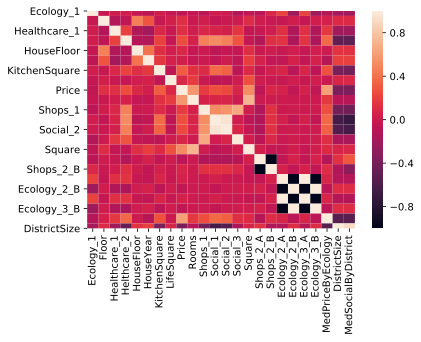

In [55]:
sns.heatmap(df.corr())

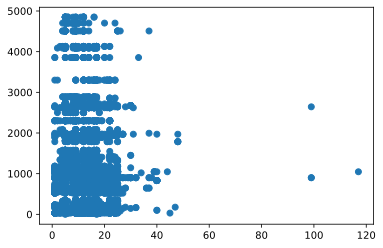

In [56]:
plt.scatter(df['HouseFloor'], df['Healthcare_1']);

Text(0, 0.5, 'Price')

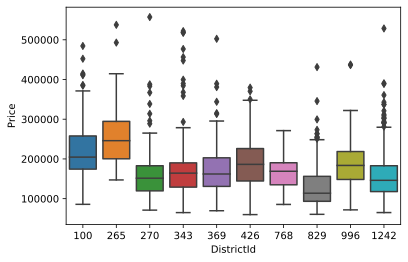

In [57]:
df_DistrictSize = df[df['DistrictSize'].isin(df['DistrictSize'].value_counts().head(10).index)]

sns.boxplot(df_DistrictSize['DistrictSize'], df['Price'])
plt.xlabel('DistrictId')
plt.ylabel('Price')

### Отделение тестового набора

In [58]:
df_test = df.loc[df['Price'].isnull(), :]

In [59]:
df_test.drop('Price', axis=1, inplace=True)
df_test.head()

,DistrictId,Ecology_1,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Rooms,Shops_1,Social_1,Social_2,Social_3,Square,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,MedPriceByEcology,DistrictSize,MedSocialByDistrict
10000,58,0.310199,6,900.0,0,14.0,1972.0,6.0,33.432782,2.0,0,11,2748,1,49.882643,0,1,0,1,0,1,147247.874311,270,270.0
10001,74,0.075779,6,900.0,0,1.0,1977.0,1.0,56.871081,2.0,2,6,1437,3,69.263183,0,1,0,1,0,1,189274.011249,175,829.0
10002,190,0.000000,2,4702.0,5,5.0,1909.0,12.0,15.948246,1.0,5,30,7538,87,13.597819,0,1,0,1,0,1,526438.458919,9,19.0
10003,47,0.101872,22,900.0,3,22.0,2007.0,9.0,51.940842,2.0,3,23,4583,3,73.046609,0,1,0,1,0,1,221914.062737,146,146.0
10004,27,0.072158,17,900.0,0,17.0,2017.0,1.0,43.387569,1.0,0,2,629,1,47.527111,1,0,0,1,0,1,171257.516444,1242,1242.0


In [60]:
df_train = df.loc[~df['Price'].isnull(), :]
df_train.head()

,DistrictId,Ecology_1,Floor,Healthcare_1,Helthcare_2,HouseFloor,HouseYear,KitchenSquare,LifeSquare,Price,Rooms,Shops_1,Social_1,Social_2,Social_3,Square,Shops_2_A,Shops_2_B,Ecology_2_A,Ecology_2_B,Ecology_3_A,Ecology_3_B,MedPriceByEcology,DistrictSize,MedSocialByDistrict
0,35,0.089040,7,900.0,0,9.0,1969.0,6.0,29.442751,184966.930730,2.0,11,33,7976,5,47.981561,0,1,0,1,0,1,203602.408898,36,72.0
1,41,0.000070,7,240.0,1,9.0,1978.0,8.0,40.049543,300009.450063,3.0,16,46,10309,1,65.683640,0,1,0,1,0,1,172138.913524,131,131.0
2,53,0.049637,8,229.0,1,12.0,1968.0,0.0,29.197612,220925.908524,2.0,3,34,7759,0,44.947953,0,1,0,1,0,1,255009.423672,265,265.0
3,58,0.437885,8,1084.0,0,17.0,1977.0,9.0,52.731512,175616.227217,2.0,5,23,5735,3,53.352981,0,1,0,1,0,1,132736.178641,270,270.0
4,99,0.012339,11,2078.0,2,12.0,1976.0,7.0,23.776169,150226.531644,1.0,4,35,5776,1,39.649192,0,1,0,1,0,1,186983.021586,139,139.0


In [61]:
# df_train.to_csv('df_train_prepared.csv', index=False, encoding='utf-8')
# df_test.to_csv('df__test_prepared.csv', index=False, encoding='utf-8')

### Отбор признаков

In [62]:
df_train.columns.tolist()

['DistrictId',
 'Ecology_1',
 'Floor',
 'Healthcare_1',
 'Helthcare_2',
 'HouseFloor',
 'HouseYear',
 'KitchenSquare',
 'LifeSquare',
 'Price',
 'Rooms',
 'Shops_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Square',
 'Shops_2_A',
 'Shops_2_B',
 'Ecology_2_A',
 'Ecology_2_B',
 'Ecology_3_A',
 'Ecology_3_B',
 'MedPriceByEcology',
 'DistrictSize',
 'MedSocialByDistrict']

In [63]:
feature_names = ['Ecology_1', 'Floor', 'Healthcare_1', 'Helthcare_2', 'HouseFloor', 'HouseYear', 'KitchenSquare', 
                 'LifeSquare', 'Rooms', 'Shops_1', 'Social_1', 'Social_2', 'Social_3', 'Square', 'Shops_2_A', 
                 'Shops_2_B', 'Ecology_2_A', 'Ecology_2_B',]

new_feature_names = ['MedPriceByEcology', 'DistrictSize', 'MedSocialByDistrict']

target_name = 'Price'

#### Признаки отобраны на основе rf_model.feature_importances_

In [64]:
reduced_features = ['Ecology_1', 'Floor', 'Healthcare_1', 'HouseFloor', 'HouseYear', 'KitchenSquare',
                    'LifeSquare', 'Rooms', 'Social_1', 'Social_2', 'Social_3', 'Square', 'MedPriceByEcology', 
                    'DistrictSize', 'MedSocialByDistrict']

### Разбиение на train и val

In [65]:
X = df_train[reduced_features]
y = df_train[target_name]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [66]:
X_test = df_test[reduced_features]

### Настройка параметров модели

In [67]:
rf_model = RandomForestRegressor(random_state = 100)

In [68]:
# parameters = {
#     'n_estimators': [100, 200, 500],
#     'max_features': [4, 7, 10], 
#     'min_samples_leaf': [1, 3, 5], 
#     'max_depth': [5, 10, None]
# }

# rfc = RandomForestRegressor(random_state=21, 
#                              n_jobs=-1, oob_score=True)
# gcv = GridSearchCV(rfc, parameters, scoring='r2', n_jobs=-1, cv=3, verbose=1)
# gcv.fit(X, y)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  5.9min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=-1,
                                             oob_score=True, random_state=21,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [5, 10, None], 'max_featu

In [69]:
# print('Лучшие параметры:', gcv.best_params_)
# print('Лучший результат:', gcv.best_score_)

Лучшие параметры: {'max_depth': None, 'max_features': 4, 'min_samples_leaf': 1, 'n_estimators': 500}
Лучший результат: 0.756153664813867


In [70]:
# gcv.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=21, verbose=0,
                      warm_start=False)

### Тренировка и тестирование модели

In [71]:
rf_model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=21, verbose=0,
                      warm_start=False)

rf_model.fit(X_train, y_train)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=4, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
                      oob_score=True, random_state=21, verbose=0,
                      warm_start=False)

In [72]:
y_pred_train = rf_model.predict(X_train)

In [73]:
r2(y_train, y_pred_train)

0.9675173216360045

In [74]:
y_pred_val = rf_model.predict(X_val)

In [75]:
r2(y_val, y_pred_val)

0.7453857735126214

### Предсказание на тестовом наборе

In [76]:
y_test_preds = rf_model.predict(X_test)

In [77]:
test_data = pd.DataFrame({'ID': test_id, 'Price': y_test_preds})

In [78]:
test_data.head()

,ID,Price
0,725,153581.682235
1,15856,238249.660691
2,5480,254105.101881
3,15664,326476.367711
4,14275,146609.647929


In [79]:
test_data.to_csv('Lyutova_Daria_prediction.csv', index=False)